<a href="https://colab.research.google.com/github/PreetishL/MyWork/blob/master/My_Amazon_Account_Money_Spent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import numpy as np
import pandas as pd

In [76]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [77]:
df = pd.read_csv('gdrive/My Drive/Amazon_orders.csv')
df

,Order Date,Order ID,Title,Category,ASIN/ISBN,UNSPSC Code,Website,Release Date,Condition,Seller,Seller Credentials,List Price Per Unit,Purchase Price Per Unit,Quantity,Payment Instrument Type,Purchase Order Number,PO Line Number,Ordering Customer Email,Shipment Date,Shipping Address Name,Shipping Address Street 1,Shipping Address Street 2,Shipping Address City,Shipping Address State,Shipping Address Zip,Order Status,Carrier Name & Tracking Number,Item Subtotal,Item Subtotal Tax,Item Total,Tax Exemption Applied,Tax Exemption Type,Exemption Opt-Out,Buyer Name,Currency,Group Name
0,10/16/20,113-4196934-0129828,Apple AirPods Pro,HEADPHONES,B07ZPC9QD4,52161554,Amazon.com,2020-11-21T00:00:01,new,Amazon.com,NaN,$249.00,$199.00,1,Discover2400,NaN,NaN,limaye.pr@northeastern.edu,10/17/20,Aditya Khiste,75 SAINT ALPHONSUS ST APT 2015,NaN,BOSTON,MA,02120-1694,Shipped,AMZN_US(TBA030506809404),$199.00,$12.44,$211.44,NaN,NaN,NaN,Preetish Limaye,USD,NaN
1,10/16/20,113-4196934-0129828,"ATUAT Compatible with AirPods Pro Case, Protec...",PORTABLE_ELECTRONIC_DEVICE_COVER,B081TQ9V4G,43210000,Amazon.com,NaN,new,ATUAT®,NaN,$14.99,$4.99,1,Discover2400,NaN,NaN,limaye.pr@northeastern.edu,10/17/20,Aditya Khiste,75 SAINT ALPHONSUS ST APT 2015,NaN,BOSTON,MA,02120-1694,Shipped,AMZN_US(TBA030681643704),$4.99,$0.31,$5.30,NaN,NaN,NaN,Preetish Limaye,USD,NaN
2,10/16/20,113-4196934-0129828,Vitamin D3 by Nature’s Bounty for immune suppo...,VITAMIN,B004JO99TG,50000000,Amazon.com,NaN,new,Amazon.com,NaN,$16.29,$10.09,1,Discover2400,NaN,NaN,limaye.pr@northeastern.edu,10/17/20,Aditya Khiste,75 SAINT ALPHONSUS ST APT 2015,NaN,BOSTON,MA,02120-1694,Shipped,AMZN_US(TBA030681643704),$10.09,$0.58,$10.67,NaN,NaN,NaN,Preetish Limaye,USD,NaN
3,10/16/20,113-4196934-0129828,"Vitamin B12 by Nature's Bounty, Vitamin Supple...",VITAMIN,B00DYSUQR2,50000000,Amazon.com,NaN,new,Amazon.com,NaN,$19.99,$9.44,2,Discover2400,NaN,NaN,limaye.pr@northeastern.edu,10/17/20,Aditya Khiste,75 SAINT ALPHONSUS ST APT 2015,NaN,BOSTON,MA,02120-1694,Shipped,AMZN_US(TBA030681643704),$18.88,$1.12,$20.00,NaN,NaN,NaN,Preetish Limaye,USD,NaN
4,10/25/20,113-9603559-0617003,Sony MDREX15AP In-Ear Earbud Headphones with M...,WEBCAM,B00JG2WRUO,43191609,Amazon.com,NaN,new,Amazon.com,NaN,$19.99,$9.99,1,Visa - 3942,NaN,NaN,limaye.pr@northeastern.edu,10/25/20,Sumedh Chandratre,4070 HUERFANO AVE APT 322,NaN,SAN DIEGO,CA,92117-5217,Shipped,AMZN_US(TBA001413034903),$9.99,$0.77,$10.76,NaN,NaN,NaN,Preetish Limaye,USD,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,01/29/21,113-5769072-4431416,"Mountain Dew Soda, 12 Fl Oz (pack of 24)",DRINK_FLAVORED,B003QB1A72,50202300,Amazon.com,NaN,new,AmazonFresh,NaN,$22.98,$8.99,1,MasterCard - 4577,NaN,NaN,limaye.pr@northeastern.edu,01/31/21,Niranjan Vaidya,75 SAINT ALPHONSUS ST APT 2015,NaN,ROXBURY CROSSING,MA,02120-1694,Shipped,"RABBIT(L52XD7ZKL9MGDUQRR7N5),RABBIT(BZH1LYHSKG...",$8.99,$0.00,$8.99,NaN,NaN,NaN,Preetish Limaye,USD,NaN
106,01/29/21,113-5769072-4431416,"Fyffes, Organic Bananas, One Banded Bunch (5 ct)",FRUIT,B07ZLFKBFD,50000000,Amazon.com,NaN,new,AmazonFresh,NaN,$0.00,$1.39,1,MasterCard - 4577,NaN,NaN,limaye.pr@northeastern.edu,01/31/21,Niranjan Vaidya,75 SAINT ALPHONSUS ST APT 2015,NaN,ROXBURY CROSSING,MA,02120-1694,Shipped,"RABBIT(L52XD7ZKL9MGDUQRR7N5),RABBIT(BZH1LYHSKG...",$1.39,$0.00,$1.39,NaN,NaN,NaN,Preetish Limaye,USD,NaN
107,01/29/21,113-5769072-4431416,Cucumber,VEGETABLE,B001W3T2E4,50000000,Amazon.com,NaN,new,AmazonFresh,NaN,$0.00,$0.79,1,MasterCard - 4577,NaN,NaN,limaye.pr@northeastern.edu,01/31/21,Niranjan Vaidya,75 SAINT ALPHONSUS ST APT 2015,NaN,ROXBURY CROSSING,MA,02120-1694,Shipped,"RABBIT(L52XD7ZKL9MGDUQRR7N5),RABBIT(BZH1LYHSKG...",$0.79,$0.00,$0.79,NaN,NaN,NaN,Preetish Limaye,USD,NaN
108,01/29/21,113-6492742-7520251,ZMUIPNG USB C Hub Adapter for Macbook Pro Air ...,MULTIPORT_HUB,B07BP6SYLK,43211600,Amazon.com,NaN,new,ZMUIPNG,NaN,$27.99,$17.99,1,Mas

In [78]:
df.head(3)

,Order Date,Order ID,Title,Category,ASIN/ISBN,UNSPSC Code,Website,Release Date,Condition,Seller,Seller Credentials,List Price Per Unit,Purchase Price Per Unit,Quantity,Payment Instrument Type,Purchase Order Number,PO Line Number,Ordering Customer Email,Shipment Date,Shipping Address Name,Shipping Address Street 1,Shipping Address Street 2,Shipping Address City,Shipping Address State,Shipping Address Zip,Order Status,Carrier Name & Tracking Number,Item Subtotal,Item Subtotal Tax,Item Total,Tax Exemption Applied,Tax Exemption Type,Exemption Opt-Out,Buyer Name,Currency,Group Name
0,10/16/20,113-4196934-0129828,Apple AirPods Pro,HEADPHONES,B07ZPC9QD4,52161554,Amazon.com,2020-11-21T00:00:01,new,Amazon.com,NaN,$249.00,$199.00,1,Discover2400,NaN,NaN,limaye.pr@northeastern.edu,10/17/20,Aditya Khiste,75 SAINT ALPHONSUS ST APT 2015,NaN,BOSTON,MA,02120-1694,Shipped,AMZN_US(TBA030506809404),$199.00,$12.44,$211.44,NaN,NaN,NaN,Preetish Limaye,USD,NaN
1,10/16/20,113-4196934-0129828,"ATUAT Compatible with AirPods Pro Case, Protec...",PORTABLE_ELECTRONIC_DEVICE_COVER,B081TQ9V4G,43210000,Amazon.com,NaN,new,ATUAT®,NaN,$14.99,$4.99,1,Discover2400,NaN,NaN,limaye.pr@northeastern.edu,10/17/20,Aditya Khiste,75 SAINT ALPHONSUS ST APT 2015,NaN,BOSTON,MA,02120-1694,Shipped,AMZN_US(TBA030681643704),$4.99,$0.31,$5.30,NaN,NaN,NaN,Preetish Limaye,USD,NaN
2,10/16/20,113-4196934-0129828,Vitamin D3 by Nature’s Bounty for immune suppo...,VITAMIN,B004JO99TG,50000000,Amazon.com,NaN,new,Amazon.com,NaN,$16.29,$10.09,1,Discover2400,NaN,NaN,limaye.pr@northeastern.edu,10/17/20,Aditya Khiste,75 SAINT ALPHONSUS ST APT 2015,NaN,BOSTON,MA,02120-1694,Shipped,AMZN_US(TBA030681643704),$10.09,$0.58,$10.67,NaN,NaN,NaN,Preetish Limaye,USD,NaN


In [79]:
df.tail(5)

,Order Date,Order ID,Title,Category,ASIN/ISBN,UNSPSC Code,Website,Release Date,Condition,Seller,Seller Credentials,List Price Per Unit,Purchase Price Per Unit,Quantity,Payment Instrument Type,Purchase Order Number,PO Line Number,Ordering Customer Email,Shipment Date,Shipping Address Name,Shipping Address Street 1,Shipping Address Street 2,Shipping Address City,Shipping Address State,Shipping Address Zip,Order Status,Carrier Name & Tracking Number,Item Subtotal,Item Subtotal Tax,Item Total,Tax Exemption Applied,Tax Exemption Type,Exemption Opt-Out,Buyer Name,Currency,Group Name
105,01/29/21,113-5769072-4431416,"Mountain Dew Soda, 12 Fl Oz (pack of 24)",DRINK_FLAVORED,B003QB1A72,50202300,Amazon.com,NaN,new,AmazonFresh,NaN,$22.98,$8.99,1,MasterCard - 4577,NaN,NaN,limaye.pr@northeastern.edu,01/31/21,Niranjan Vaidya,75 SAINT ALPHONSUS ST APT 2015,NaN,ROXBURY CROSSING,MA,02120-1694,Shipped,"RABBIT(L52XD7ZKL9MGDUQRR7N5),RABBIT(BZH1LYHSKG...",$8.99,$0.00,$8.99,NaN,NaN,NaN,Preetish Limaye,USD,NaN
106,01/29/21,113-5769072-4431416,"Fyffes, Organic Bananas, One Banded Bunch (5 ct)",FRUIT,B07ZLFKBFD,50000000,Amazon.com,NaN,new,AmazonFresh,NaN,$0.00,$1.39,1,MasterCard - 4577,NaN,NaN,limaye.pr@northeastern.edu,01/31/21,Niranjan Vaidya,75 SAINT ALPHONSUS ST APT 2015,NaN,ROXBURY CROSSING,MA,02120-1694,Shipped,"RABBIT(L52XD7ZKL9MGDUQRR7N5),RABBIT(BZH1LYHSKG...",$1.39,$0.00,$1.39,NaN,NaN,NaN,Preetish Limaye,USD,NaN
107,01/29/21,113-5769072-4431416,Cucumber,VEGETABLE,B001W3T2E4,50000000,Amazon.com,NaN,new,AmazonFresh,NaN,$0.00,$0.79,1,MasterCard - 4577,NaN,NaN,limaye.pr@northeastern.edu,01/31/21,Niranjan Vaidya,75 SAINT ALPHONSUS ST APT 2015,NaN,ROXBURY CROSSING,MA,02120-1694,Shipped,"RABBIT(L52XD7ZKL9MGDUQRR7N5),RABBIT(BZH1LYHSKG...",$0.79,$0.00,$0.79,NaN,NaN,NaN,Preetish Limaye,USD,NaN
108,01/29/21,113-6492742-7520251,ZMUIPNG USB C Hub Adapter for Macbook Pro Air ...,MULTIPORT_HUB,B07BP6SYLK,43211600,Amazon.com,NaN,new,ZMUIPNG,NaN,$27.99,$17.99,1,MasterCard - 4577,NaN,NaN,limaye.pr@northeastern.edu,01/30/21,Niranjan Vaidya,75 SAINT ALPHONSUS ST APT 2015,NaN,ROXBURY CROSSING,MA,02120-1694,Shipped,AMZN_US(TBA005168418303),$17.99,$1.12,$19.11,False,NaN,False,Preetish Limaye,USD,NaN
109,02/07/21,113-7570295-4929007,"Dr Teal's Foaming Bath (Epsom Salt), Eucalyptu...",BATHWATER_ADDITIVE,B007THNPBS,53131600,Amazon.com,NaN,new,Amazon.com,NaN,$5.99,$4.87,1,Discover2400,NaN,NaN,limaye.pr@northeastern.edu,02/07/21,Maharshi Kondvilkar,75 SAINT ALPHONSUS ST APT 2015,NaN,BOSTON,MA,02120-1694,Shipped,AMZN_US(TBA161584518204),$4.87,$0.30,$5.17,False,NaN,False,Preetish Limaye,USD,NaN


In [80]:
df.shape

(110, 36)

In [81]:
df.fillna(0)
df.head(5)

,Order Date,Order ID,Title,Category,ASIN/ISBN,UNSPSC Code,Website,Release Date,Condition,Seller,Seller Credentials,List Price Per Unit,Purchase Price Per Unit,Quantity,Payment Instrument Type,Purchase Order Number,PO Line Number,Ordering Customer Email,Shipment Date,Shipping Address Name,Shipping Address Street 1,Shipping Address Street 2,Shipping Address City,Shipping Address State,Shipping Address Zip,Order Status,Carrier Name & Tracking Number,Item Subtotal,Item Subtotal Tax,Item Total,Tax Exemption Applied,Tax Exemption Type,Exemption Opt-Out,Buyer Name,Currency,Group Name
0,10/16/20,113-4196934-0129828,Apple AirPods Pro,HEADPHONES,B07ZPC9QD4,52161554,Amazon.com,2020-11-21T00:00:01,new,Amazon.com,NaN,$249.00,$199.00,1,Discover2400,NaN,NaN,limaye.pr@northeastern.edu,10/17/20,Aditya Khiste,75 SAINT ALPHONSUS ST APT 2015,NaN,BOSTON,MA,02120-1694,Shipped,AMZN_US(TBA030506809404),$199.00,$12.44,$211.44,NaN,NaN,NaN,Preetish Limaye,USD,NaN
1,10/16/20,113-4196934-0129828,"ATUAT Compatible with AirPods Pro Case, Protec...",PORTABLE_ELECTRONIC_DEVICE_COVER,B081TQ9V4G,43210000,Amazon.com,NaN,new,ATUAT®,NaN,$14.99,$4.99,1,Discover2400,NaN,NaN,limaye.pr@northeastern.edu,10/17/20,Aditya Khiste,75 SAINT ALPHONSUS ST APT 2015,NaN,BOSTON,MA,02120-1694,Shipped,AMZN_US(TBA030681643704),$4.99,$0.31,$5.30,NaN,NaN,NaN,Preetish Limaye,USD,NaN
2,10/16/20,113-4196934-0129828,Vitamin D3 by Nature’s Bounty for immune suppo...,VITAMIN,B004JO99TG,50000000,Amazon.com,NaN,new,Amazon.com,NaN,$16.29,$10.09,1,Discover2400,NaN,NaN,limaye.pr@northeastern.edu,10/17/20,Aditya Khiste,75 SAINT ALPHONSUS ST APT 2015,NaN,BOSTON,MA,02120-1694,Shipped,AMZN_US(TBA030681643704),$10.09,$0.58,$10.67,NaN,NaN,NaN,Preetish Limaye,USD,NaN
3,10/16/20,113-4196934-0129828,"Vitamin B12 by Nature's Bounty, Vitamin Supple...",VITAMIN,B00DYSUQR2,50000000,Amazon.com,NaN,new,Amazon.com,NaN,$19.99,$9.44,2,Discover2400,NaN,NaN,limaye.pr@northeastern.edu,10/17/20,Aditya Khiste,75 SAINT ALPHONSUS ST APT 2015,NaN,BOSTON,MA,02120-1694,Shipped,AMZN_US(TBA030681643704),$18.88,$1.12,$20.00,NaN,NaN,NaN,Preetish Limaye,USD,NaN
4,10/25/20,113-9603559-0617003,Sony MDREX15AP In-Ear Earbud Headphones with M...,WEBCAM,B00JG2WRUO,43191609,Amazon.com,NaN,new,Amazon.com,NaN,$19.99,$9.99,1,Visa - 3942,NaN,NaN,limaye.pr@northeastern.edu,10/25/20,Sumedh Chandratre,4070 HUERFANO AVE APT 322,NaN,SAN DIEGO,CA,92117-5217,Shipped,AMZN_US(TBA001413034903),$9.99,$0.77,$10.76,NaN,NaN,NaN,Preetish Limaye,USD,NaN


In [82]:
type('List Price Per Unit')

str

In [83]:
df['List Price Per Unit']=df['List Price Per Unit'].str.replace('$','').astype(float)
df['List Price Per Unit']

0      249.00
1       14.99
2       16.29
3       19.99
4       19.99
        ...  
105     22.98
106      0.00
107      0.00
108     27.99
109      5.99
Name: List Price Per Unit, Length: 110, dtype: float64

In [84]:
df['Item Total']=df['Item Total'].str.replace('$','').astype(float)
df['Item Total']

0      211.44
1        5.30
2       10.67
3       20.00
4       10.76
        ...  
105      8.99
106      1.39
107      0.79
108     19.11
109      5.17
Name: Item Total, Length: 110, dtype: float64

In [85]:
df['Item Total'].sum()

1021.6

In [86]:
df["Item Total"].mean()

9.287272727272725

In [87]:
df["Item Total"].median()

4.574999999999999

In [88]:
df["Item Total"].max()

211.44

In [89]:
df["Item Total"].min()

0.0

**How Much Have I Paid in Sales Tax?**

In [90]:
df['Item Subtotal Tax'] = df['Item Subtotal Tax'].str.replace('$','').astype(float)
df['Item Subtotal Tax']

0      12.44
1       0.31
2       0.58
3       1.12
4       0.77
       ...  
105     0.00
106     0.00
107     0.00
108     1.12
109     0.30
Name: Item Subtotal Tax, Length: 110, dtype: float64

In [91]:
df['Item Subtotal Tax'].sum()

37.10999999999999

In [95]:
percent_tx = df['Item Subtotal Tax'].sum() / df['Item Total'].sum()
percent_tx

0.03632537196554424

**Analyzing Amazon Spending Over Time**

In [96]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.head()

,Order Date,Order ID,Title,Category,ASIN/ISBN,UNSPSC Code,Website,Release Date,Condition,Seller,Seller Credentials,List Price Per Unit,Purchase Price Per Unit,Quantity,Payment Instrument Type,Purchase Order Number,PO Line Number,Ordering Customer Email,Shipment Date,Shipping Address Name,Shipping Address Street 1,Shipping Address Street 2,Shipping Address City,Shipping Address State,Shipping Address Zip,Order Status,Carrier Name & Tracking Number,Item Subtotal,Item Subtotal Tax,Item Total,Tax Exemption Applied,Tax Exemption Type,Exemption Opt-Out,Buyer Name,Currency,Group Name
0,2020-10-16,113-4196934-0129828,Apple AirPods Pro,HEADPHONES,B07ZPC9QD4,52161554,Amazon.com,2020-11-21T00:00:01,new,Amazon.com,NaN,249.00,$199.00,1,Discover2400,NaN,NaN,limaye.pr@northeastern.edu,10/17/20,Aditya Khiste,75 SAINT ALPHONSUS ST APT 2015,NaN,BOSTON,MA,02120-1694,Shipped,AMZN_US(TBA030506809404),$199.00,12.44,211.44,NaN,NaN,NaN,Preetish Limaye,USD,NaN
1,2020-10-16,113-4196934-0129828,"ATUAT Compatible with AirPods Pro Case, Protec...",PORTABLE_ELECTRONIC_DEVICE_COVER,B081TQ9V4G,43210000,Amazon.com,NaN,new,ATUAT®,NaN,14.99,$4.99,1,Discover2400,NaN,NaN,limaye.pr@northeastern.edu,10/17/20,Aditya Khiste,75 SAINT ALPHONSUS ST APT 2015,NaN,BOSTON,MA,02120-1694,Shipped,AMZN_US(TBA030681643704),$4.99,0.31,5.30,NaN,NaN,NaN,Preetish Limaye,USD,NaN
2,2020-10-16,113-4196934-0129828,Vitamin D3 by Nature’s Bounty for immune suppo...,VITAMIN,B004JO99TG,50000000,Amazon.com,NaN,new,Amazon.com,NaN,16.29,$10.09,1,Discover2400,NaN,NaN,limaye.pr@northeastern.edu,10/17/20,Aditya Khiste,75 SAINT ALPHONSUS ST APT 2015,NaN,BOSTON,MA,02120-1694,Shipped,AMZN_US(TBA030681643704),$10.09,0.58,10.67,NaN,NaN,NaN,Preetish Limaye,USD,NaN
3,2020-10-16,113-4196934-0129828,"Vitamin B12 by Nature's Bounty, Vitamin Supple...",VITAMIN,B00DYSUQR2,50000000,Amazon.com,NaN,new,Amazon.com,NaN,19.99,$9.44,2,Discover2400,NaN,NaN,limaye.pr@northeastern.edu,10/17/20,Aditya Khiste,75 SAINT ALPHONSUS ST APT 2015,NaN,BOSTON,MA,02120-1694,Shipped,AMZN_US(TBA030681643704),$18.88,1.12,20.00,NaN,NaN,NaN,Preetish Limaye,USD,NaN
4,2020-10-25,113-9603559-0617003,Sony MDREX15AP In-Ear Earbud Headphones with M...,WEBCAM,B00JG2WRUO,43191609,Amazon.com,NaN,new,Amazon.com,NaN,19.99,$9.99,1,Visa - 3942,NaN,NaN,limaye.pr@northeastern.edu,10/25/20,Sumedh Chandratre,4070 HUERFANO AVE APT 322,NaN,SAN DIEGO,CA,92117-5217,Shipped,AMZN_US(TBA001413034903),$9.99,0.77,10.76,NaN,NaN,NaN,Preetish Limaye,USD,NaN


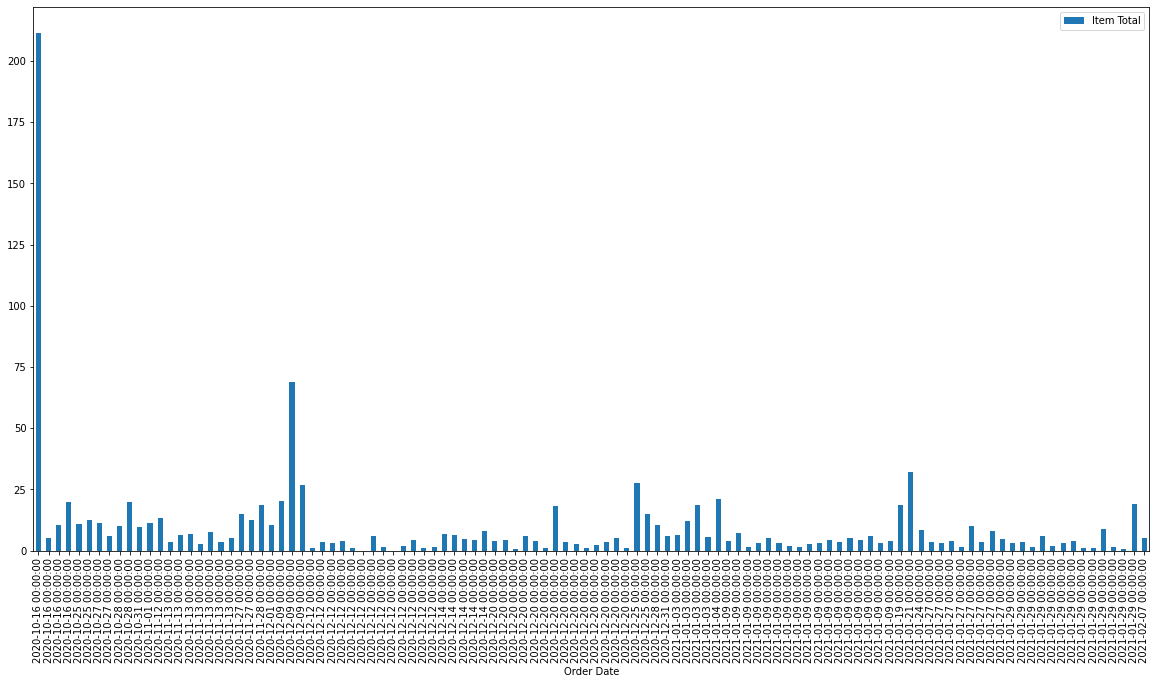

In [98]:
df.plot.bar(x='Order Date', y='Item Total', rot=90, figsize=(20,10))

In [99]:
daily_orders = df.groupby('Order Date').sum()["Item Total"]
daily_orders.head()

Order Date
2020-10-16    247.41
2020-10-25     23.48
2020-10-27     17.35
2020-10-28     29.97
2020-10-31      9.84
Name: Item Total, dtype: float64

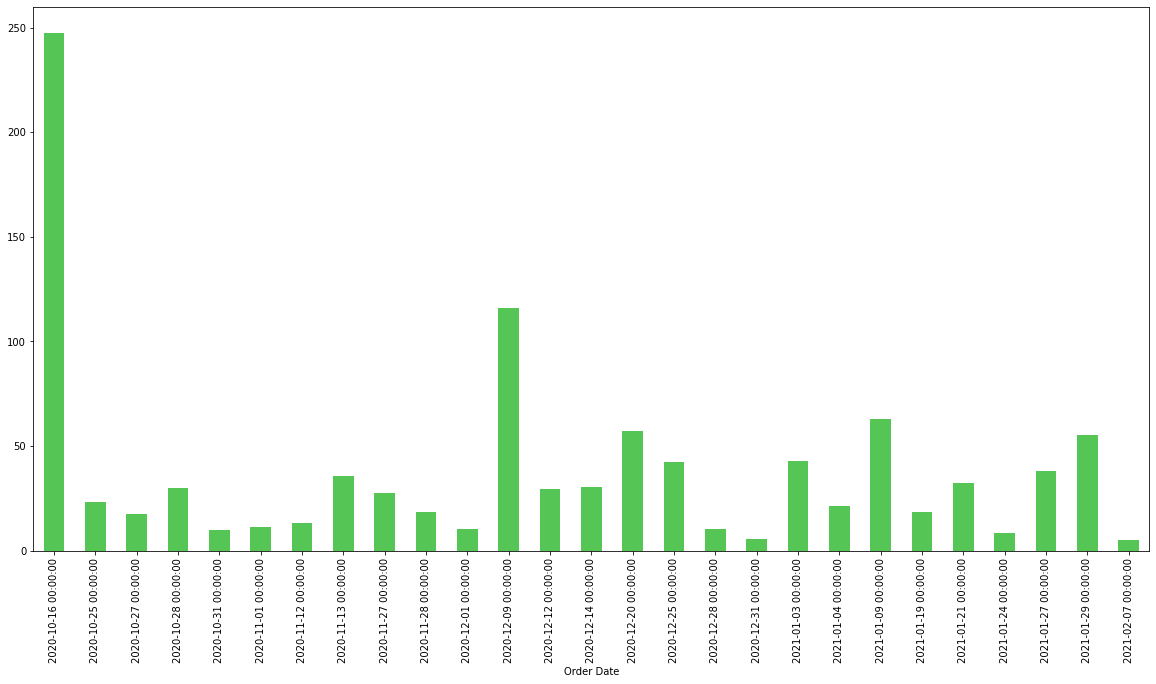

In [105]:
daily_orders.plot.bar(figsize=(20,10), color='#55C555')